In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from feature_learning import fit_svm, cross_validate_convNN
from load_and_preprocessing import load_data_and_filter_members

C:\Users\silus\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
C:\Users\silus\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


Put train data import here after

In [35]:
X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')

X_train = X_train[y_train != 2]
y_train = y_train[y_train !=2]

X_train = X_train - np.mean(X_train, axis=0)
X_train.shape

(526, 175)

In [36]:
classes, counts = np.unique(y_train, return_counts=True)
print("Classes {0}, samples per class {1}, {2}"
      .format(len(classes), counts[0], counts[1]))

Classes 2, samples per class 313, 213


In [ ]:
c_hyperparam = np.logspace(-6,-2,11)
use_kernel = 'rbf'
k_fold = 5

mean_accuracy, variance = fit_svm(X_train, y_train, use_kernel, c_hyperparam, k_fold=k_fold)

In [ ]:
fig, ax1 = plt.subplots(figsize=(15, 5))
ax1.plot(mean_accuracy, 'b.-')
ax1.set_ylabel('Accuracy', color='b')
ax2 = ax1.twinx()
ax2.plot(variance, 'g.-')
ax2.set_ylabel('training loss', color='g')
plt.show()

ConvNN:

In [5]:
leg='50'
from_date = None
to_date = None
link_cutoff = 0.7
data_transf, adjacency, node_index, affairs_features, sum_na_per_row = load_data_and_filter_members('../data/abdb-de-all-affairs-'+leg+'-0.csv',
                                                                     start_date=from_date, end_date=to_date,
                                                                     filter_method='number_NA',cutoff=10,ret_transf=True, delete_links_below=link_cutoff )

(Nbr. of councillors, nbr. of votes) before filter: (221, 1320)
(Nbr. of councillors, nbr. of votes) after filter: (175, 1320)


In [37]:
hyperparam_values = np.array([2,4,6,8,16])
hyperparam_name = 'F'
k_fold = 3
nn_accuracy, nn_loss = cross_validate_convNN(X_train, y_train, adjacency, hyperparam_name, hyperparam_values, k_fold)

Layer 0: M_0 = |V| = 256 nodes (81 added),|E| = 3726 edges
Layer 1: M_1 = |V| = 128 nodes (38 added),|E| = 969 edges
Layer 2: M_2 = |V| = 64 nodes (18 added),|E| = 244 edges
Layer 3: M_3 = |V| = 32 nodes (7 added),|E| = 65 edges
Layer 4: M_4 = |V| = 16 nodes (3 added),|E| = 16 edges
Layer 5: M_5 = |V| = 8 nodes (0 added),|E| = 5 edges
NN architecture
  input: M_0 = 256
  layer 1: cgconv1
    representation: M_0 * F_1 / p_1 = 256 * 2 / 8 = 64
    weights: F_0 * F_1 * K_1 = 1 * 2 * 10 = 20
    biases: F_1 = 2
  layer 2: cgconv2
    representation: M_1 * F_2 / p_2 = 32 * 4 / 4 = 32
    weights: F_1 * F_2 * K_2 = 2 * 4 * 10 = 80
    biases: F_2 = 4
  layer 3: fc1
    representation: M_3 = 256
    weights: M_2 * M_3 = 32 * 256 = 8192
    biases: M_3 = 256
  layer 4: logits (softmax)
    representation: M_4 = 2
    weights: M_3 * M_4 = 256 * 2 = 512
    biases: M_4 = 2
step 30 / 116 (epoch 2.57 / 10):
  learning_rate = 3.24e-02, loss_average = 6.69e-01


C:\Users\silus\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


  validation accuracy: 61.71 (108 / 175), f1 (weighted): 47.10, loss: 7.01e-01
  time: 9s (wall 8s)
step 60 / 116 (epoch 5.14 / 10):
  learning_rate = 2.36e-02, loss_average = 6.79e-01
  validation accuracy: 61.71 (108 / 175), f1 (weighted): 47.10, loss: 6.82e-01
  time: 18s (wall 14s)
step 90 / 116 (epoch 7.71 / 10):
  learning_rate = 1.91e-02, loss_average = 6.81e-01
  validation accuracy: 61.71 (108 / 175), f1 (weighted): 47.10, loss: 6.81e-01
  time: 24s (wall 20s)
step 116 / 116 (epoch 9.94 / 10):
  learning_rate = 1.55e-02, loss_average = 6.84e-01
  validation accuracy: 61.71 (108 / 175), f1 (weighted): 47.10, loss: 6.85e-01
  time: 31s (wall 25s)
validation accuracy: peak = 61.71, mean = 61.71
NN architecture
  input: M_0 = 256
  layer 1: cgconv1
    representation: M_0 * F_1 / p_1 = 256 * 2 / 8 = 64
    weights: F_0 * F_1 * K_1 = 1 * 2 * 10 = 20
    biases: F_1 = 2
  layer 2: cgconv2
    representation: M_1 * F_2 / p_2 = 32 * 4 / 4 = 32
    weights: F_1 * F_2 * K_2 = 2 * 4 * 10

step 30 / 116 (epoch 2.57 / 10):
  learning_rate = 3.24e-02, loss_average = 6.53e-01
  validation accuracy: 61.71 (108 / 175), f1 (weighted): 47.10, loss: 6.89e-01
  time: 10s (wall 7s)
step 60 / 116 (epoch 5.14 / 10):
  learning_rate = 2.36e-02, loss_average = 6.79e-01
  validation accuracy: 61.71 (108 / 175), f1 (weighted): 47.10, loss: 6.89e-01
  time: 18s (wall 14s)
step 90 / 116 (epoch 7.71 / 10):
  learning_rate = 1.91e-02, loss_average = 6.81e-01
  validation accuracy: 61.71 (108 / 175), f1 (weighted): 47.10, loss: 6.90e-01
  time: 25s (wall 19s)
step 116 / 116 (epoch 9.94 / 10):
  learning_rate = 1.55e-02, loss_average = 6.79e-01
  validation accuracy: 61.71 (108 / 175), f1 (weighted): 47.10, loss: 6.89e-01
  time: 32s (wall 24s)
validation accuracy: peak = 61.71, mean = 61.71
NN architecture
  input: M_0 = 256
  layer 1: cgconv1
    representation: M_0 * F_1 / p_1 = 256 * 6 / 8 = 192
    weights: F_0 * F_1 * K_1 = 1 * 6 * 10 = 60
    biases: F_1 = 6
  layer 2: cgconv2
    repr

step 30 / 116 (epoch 2.57 / 10):
  learning_rate = 3.24e-02, loss_average = 6.66e-01
  validation accuracy: 53.71 (94 / 175), f1 (weighted): 51.76, loss: 7.13e-01
  time: 8s (wall 5s)
step 60 / 116 (epoch 5.14 / 10):
  learning_rate = 2.36e-02, loss_average = 6.81e-01
  validation accuracy: 61.14 (107 / 175), f1 (weighted): 47.82, loss: 6.91e-01
  time: 15s (wall 10s)
step 90 / 116 (epoch 7.71 / 10):
  learning_rate = 1.91e-02, loss_average = 6.76e-01
  validation accuracy: 61.71 (108 / 175), f1 (weighted): 47.10, loss: 6.95e-01
  time: 22s (wall 14s)
step 116 / 116 (epoch 9.94 / 10):
  learning_rate = 1.55e-02, loss_average = 6.79e-01
  validation accuracy: 62.29 (109 / 175), f1 (weighted): 51.89, loss: 6.92e-01
  time: 29s (wall 17s)
validation accuracy: peak = 62.29, mean = 59.71
NN architecture
  input: M_0 = 256
  layer 1: cgconv1
    representation: M_0 * F_1 / p_1 = 256 * 16 / 8 = 512
    weights: F_0 * F_1 * K_1 = 1 * 16 * 10 = 160
    biases: F_1 = 16
  layer 2: cgconv2
    re

In [38]:
nn_accuracy

[array([59.42857143, 59.42857143]),
 array([59.42857143, 59.42857143]),
 array([59.42857143, 59.42857143]),
 array([59.61904762, 59.14285714]),
 array([59.61904762, 57.57142857])]

TypeError: list indices must be integers or slices, not tuple

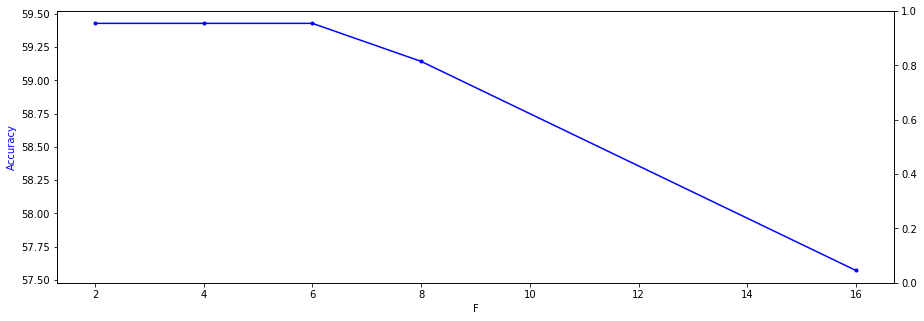

In [39]:
fig, ax1 = plt.subplots(figsize=(15, 5))
ax1.plot(hyperparam_values, np.array(nn_accuracy)[:,1], 'b.-')
ax1.set_ylabel('Accuracy', color='b')
ax1.set_xlabel(hyperparam_name)
ax2 = ax1.twinx()
ax2.plot(hyperparam_values, nn_loss[:,1], 'g.-')
ax2.set_ylabel('training loss', color='g')
plt.show()

In [16]:
nn_loss

[1.0709271430969238,
 1.1210624490465437,
 1.055032730102539,
 1.0497947760990687,
 1.0873257092067175,
 1.168379511151995,
 1.0576768262045724,
 array([69.33615855, 68.16202093])]